# Descrizione problema

Il dataset scelto contiene informazioni riguardanti le prestazioni fisiche e gli esercizi svolti da atleti, i quali sono classificati in varie classi.

L'obiettivo è quello di predire la classe (variabile discreta).

# **Caricamento librerie**

Importing delle principali librerie che utilizzeremo

In [3]:
%matplotlib inline
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# **Caricamento dati**

Caricamento del dataset dal percorso indicato, andandone poi a visualizzare il numero di istanze, il tipo delle features e lo spazio occupato in memoria 

In [4]:
filePath = "./bodyPerformance.csv";
raw_performance = pd.read_csv(filePath)

In [5]:
raw_performance.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.5 MB


In [6]:
raw_performance.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


# **Data cleaning**

Andiamo a formattare i dati in modo tale da permetterci di elaborarli con maggior semplicità

In [7]:
performance = raw_performance.copy()
# 1--> best, 4--> worst
performance['class'] = performance['class'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4})
# 0 --> uomo 
# 1 --> donna
performance['gender'] = performance['gender'].map({'M': 0, 'F': 1})

int_cols = ['age', 'sit-ups counts']
for col in int_cols:
  performance[col] = performance[col].astype("int32")

In [8]:
performance.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int32  
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  int32  
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
dtypes: float64(8), int32(2), int64(2)
memory usage: 1.1 MB


In [9]:
performance.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60,217.0,3
1,25,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53,229.0,1
2,31,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49,181.0,3
3,32,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53,219.0,2
4,28,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45,217.0,2


**Check valori nulli**

Controllando all'interno del dataset non risultano valori nulli, pertanto non dovremo preoccuparci di essi

In [10]:
performance.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [11]:
performance.describe()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,0.367804,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771149,190.129627,2.500187
std,13.625639,0.482226,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276853,39.868000,1.118109
min,21.000000,0.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,1.000000
25%,25.000000,0.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,2.000000
50%,32.000000,0.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,3.000000
75%,48.000000,1.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,4.000000
max,64.000000,1.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000,4.000000


In [12]:
performance.sort_values('sit and bend forward_cm', ascending=False).head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
2657,33,0,165.6,60.4,17.8,81.0,127.0,38.6,213.0,53,244.0,2
3355,45,0,164.4,64.4,24.3,96.0,142.0,38.5,185.0,44,223.0,1
4203,46,0,164.4,63.6,23.4,70.0,115.0,36.0,42.0,42,210.0,1


Come possiamo notare per due atleti risultano rispettivamente i valori di 213cm e 185cm in `sit and bend forward_cm`, che è impossibile, quindi procediamo nel rimuoverli

In [13]:
performance = performance[performance['sit and bend forward_cm'] < 50]
performance.sort_values('sit and bend forward_cm', ascending=False).head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
4203,46,0,164.4,63.6,23.4,70.0,115.0,36.0,42.0,42,210.0,1
4438,59,0,175.4,68.1,21.3,74.0,122.0,36.2,40.0,40,174.0,2
8905,52,0,166.3,74.3,26.0,79.0,131.0,47.1,40.0,40,194.0,2


Procediamo poi nella rimozione dei valori `systolic` (pressione massima) non validi

In [14]:
performance.sort_values('systolic', ascending=True).head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
10624,26,1,160.0,63.56,32.0,0.0,0.0,23.7,17.1,23,128.0,4
7597,30,0,166.6,66.08,14.4,67.0,14.0,53.8,17.2,57,221.0,1
8217,31,0,176.7,80.32,20.8,46.2,43.9,43.9,17.2,57,221.0,2


In [15]:
performance = performance[performance['systolic'] > 50]
performance.sort_values('systolic', ascending=True).head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
344,22,1,158.5,49.3,27.0,37.0,77.0,27.1,21.0,59,178.0,2
7341,50,1,161.5,52.0,17.9,42.0,82.0,24.5,30.2,25,163.0,1
9440,21,1,155.9,42.0,21.9,60.0,84.0,19.9,17.2,41,177.0,2


Andiamo ora a pulire i dati di `diastolic` (pressione minima) non validi

In [16]:
performance.sort_values('diastolic', ascending=True).head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
3524,44,0,177.0,78.28,22.1,6.0,145.0,47.4,10.5,42,215.0,2
336,35,0,173.1,77.60,22.8,8.0,122.0,46.4,16.7,47,216.0,2
6786,22,1,164.1,60.80,32.4,30.0,122.0,29.7,-4.6,31,159.0,4


In [17]:
performance = performance[performance['diastolic'] > 10]
performance.sort_values('diastolic', ascending=True).head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
6786,22,1,164.1,60.8,32.4,30.0,122.0,29.7,-4.6,31,159.0,4
344,22,1,158.5,49.3,27.0,37.0,77.0,27.1,21.0,59,178.0,2
6234,59,1,152.1,50.6,35.5,40.0,105.0,22.8,15.1,9,110.0,3


**Descrizione feature**

* `age`: età atleta
* `gender`: genere ( 0 --> Uomo, 1 --> Donna )
* `height_cm`: altezza
* `weight_kg`: peso
* `body fat_%`: percentuale di grasso corporeo
* `diastolic`: pressione minima
* `systolic`: pressione massima 
* `gripForce`: forza presa di mano
* `sit and bend forward_cm`: mobilità
* `sit-ups counts`: max sit-ups
* `broad jump_cm`: salto in lungo
* `class`: classe di appartenenza ( 1 --> A, 2 --> B, 3 --> C, 4 --> D )

# Analisi dati

In [18]:
def feature_plot(feature):
    plt.figure(figsize=(16, 10))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} hist')
    
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution')
    
    plt.subplot(1, 3, 3)
    plt.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


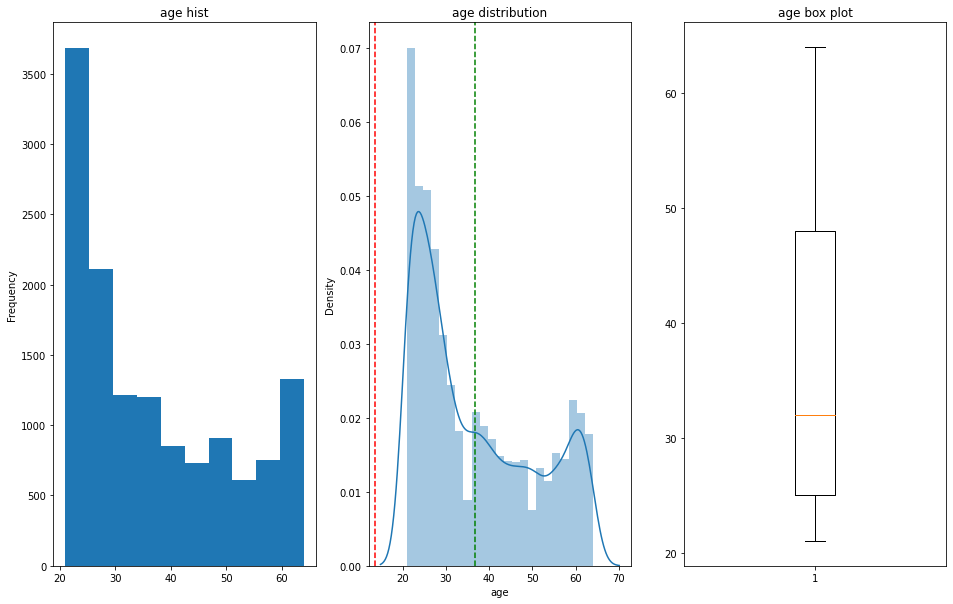

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


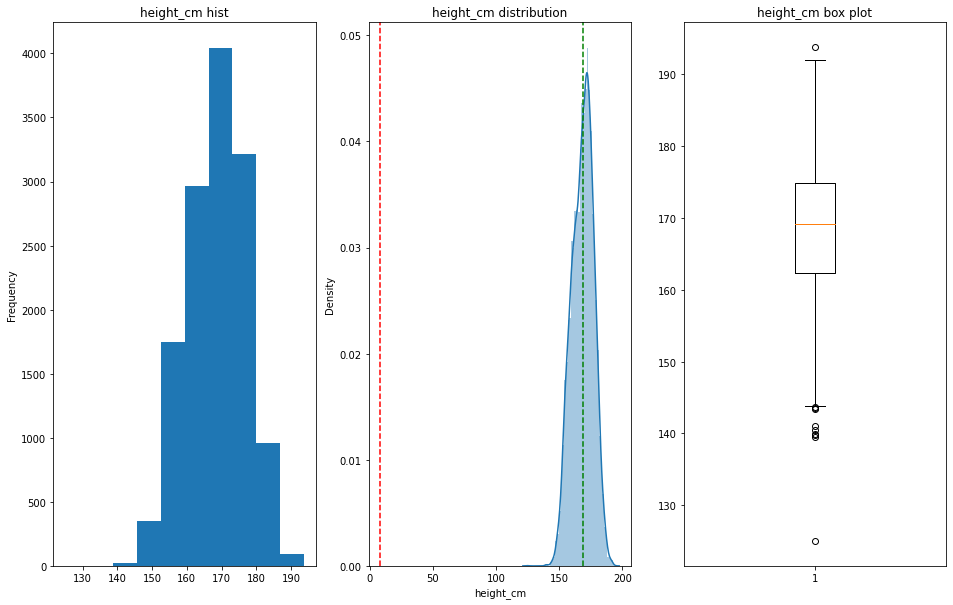

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


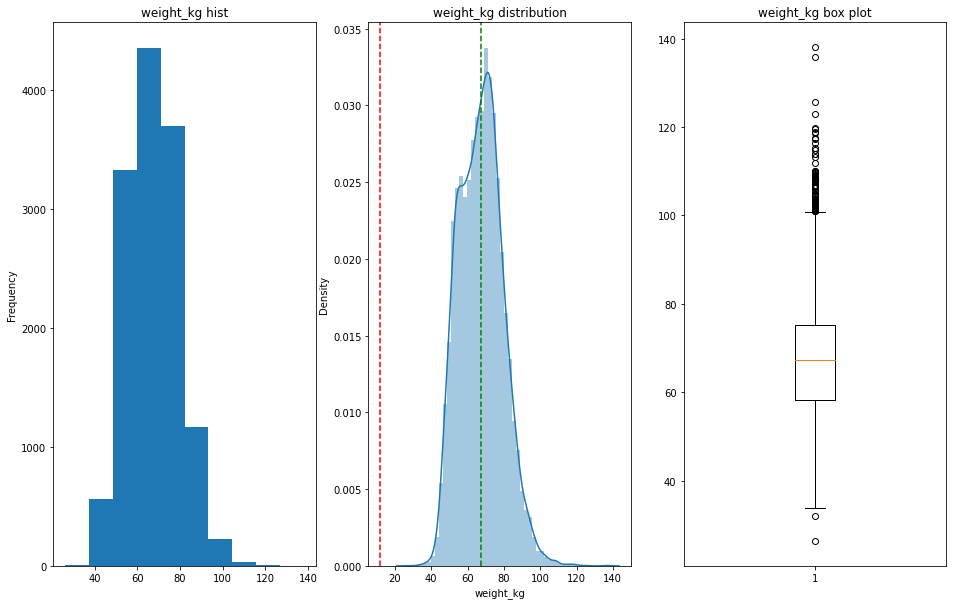

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


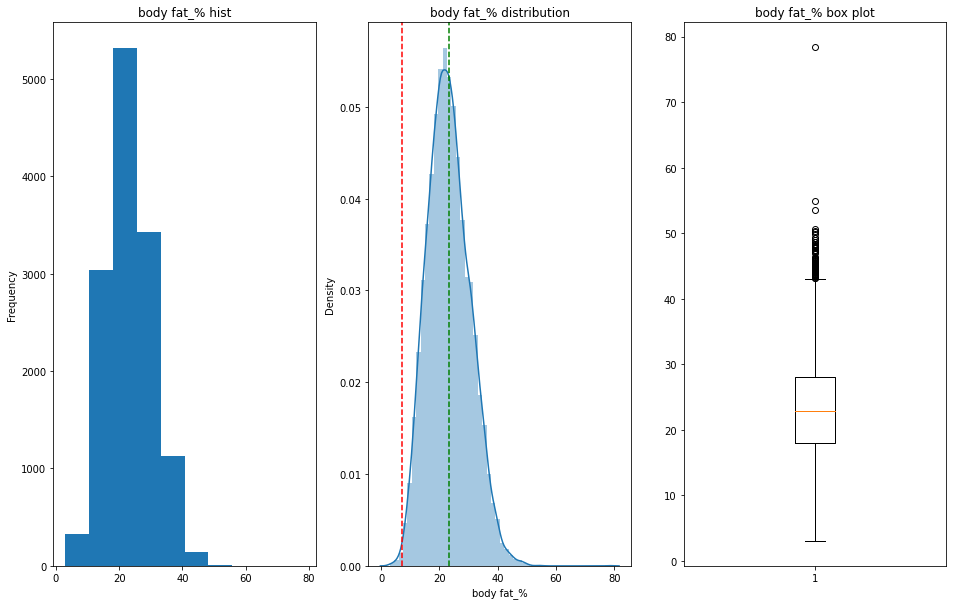

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


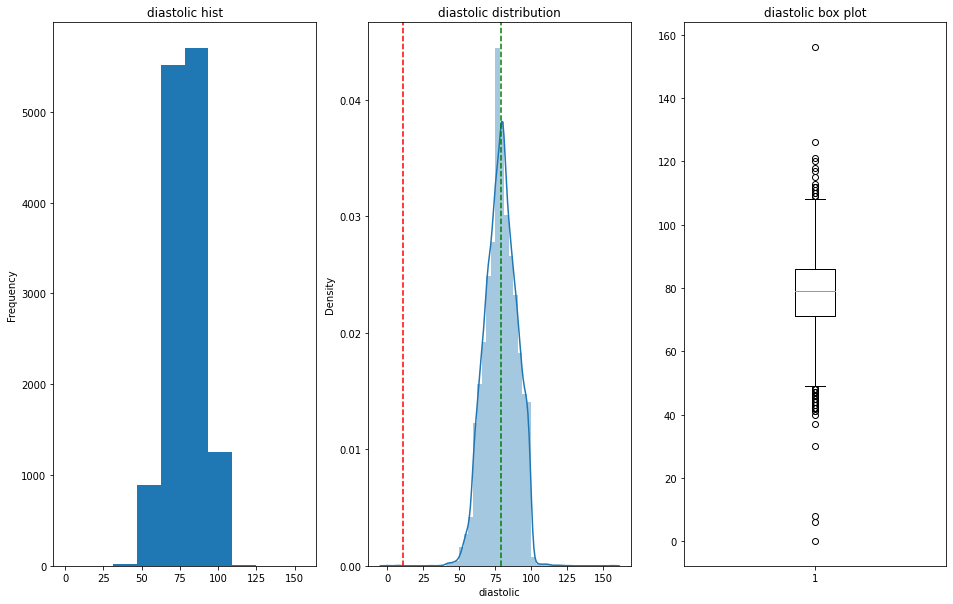

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


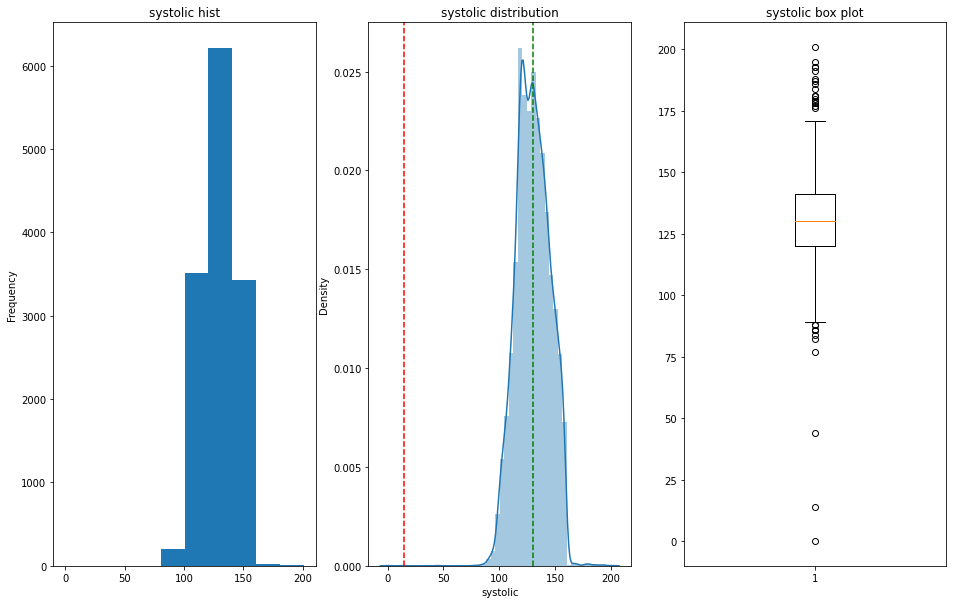

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


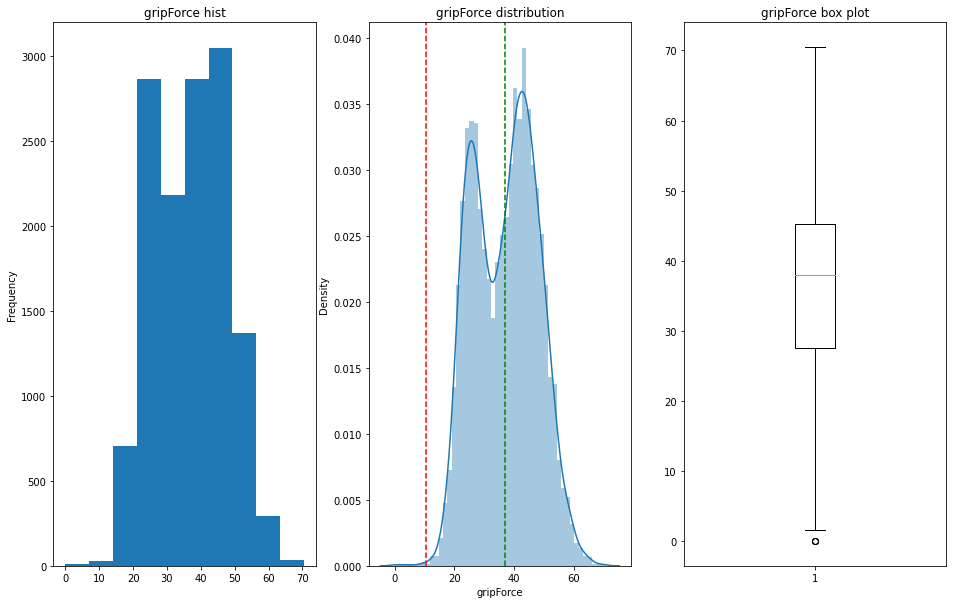

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


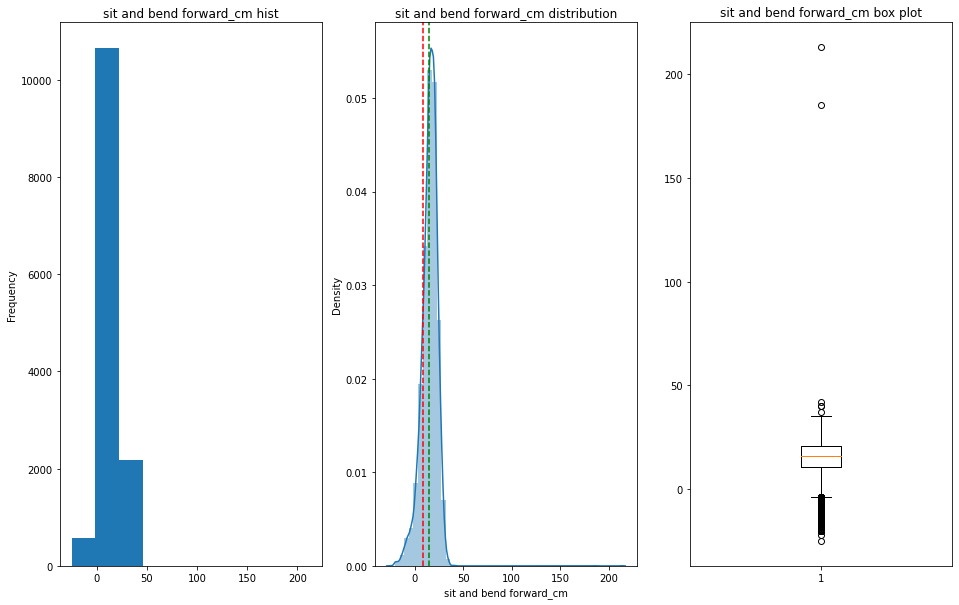

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


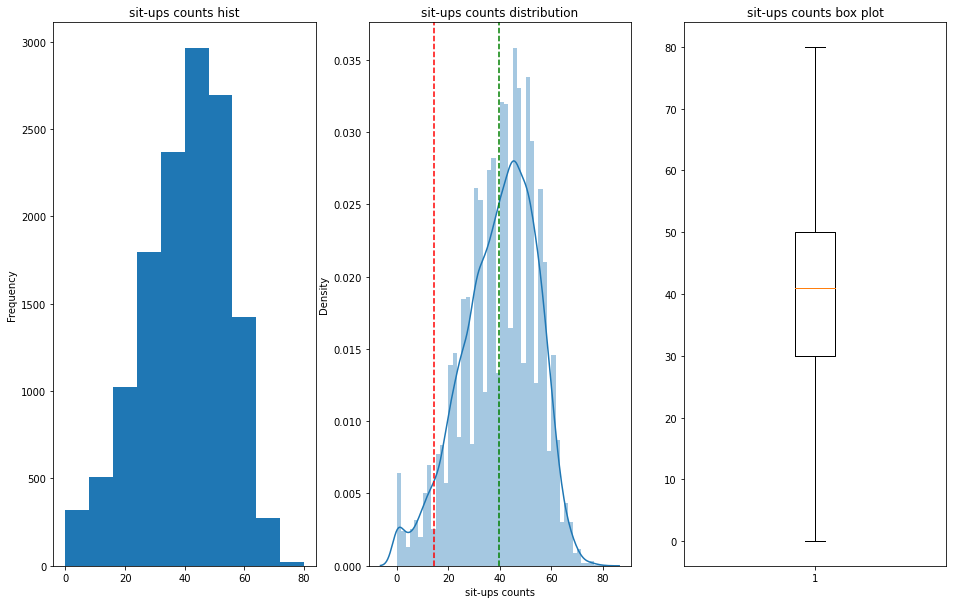

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


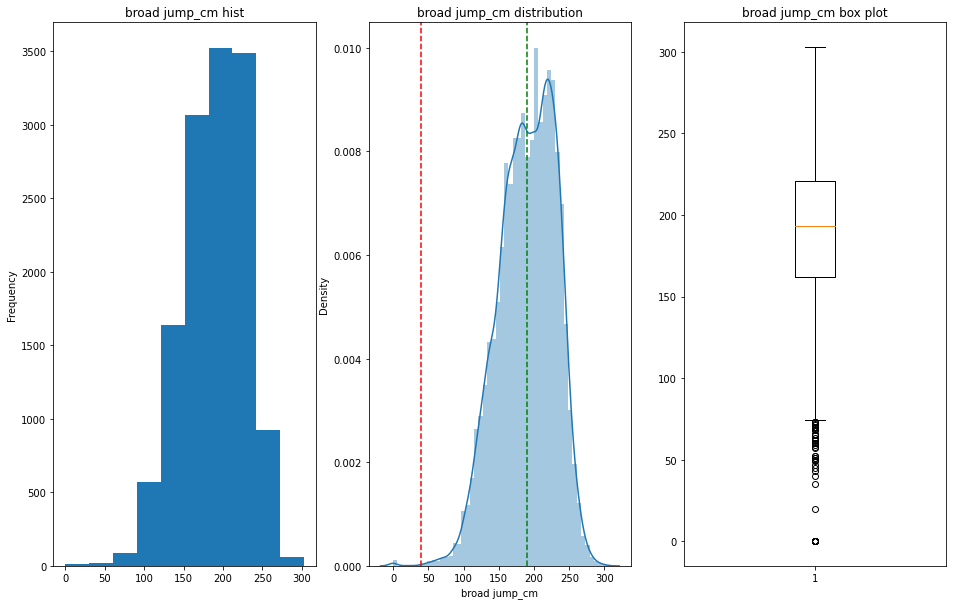

In [19]:
contin_feat = raw_performance.select_dtypes(exclude='object')
for i in contin_feat:
    feature_plot(raw_performance[i])

Dai vari istogrammi possiamo osservare come la maggior parte degli atleti hanno età compresa tra i 22 e i 25 anni.

L'altezza si distribuisce maggiormente tra i 160 e i 180 cm, mentre il peso tra i 50 e gli 80 kg.

La percentuale di grasso corporeo si trova tendenzialmente tra il 10% e il 30%.

Per quanto riguarda la pressione minima, questa varia tra i 50 e i 100 mmgH, mentre la massima tra i 100 e i 150 mmgH.

Di seguito riporto la distribuzione generale dei valori negli esercizi:

`gripForce`: 20kg - 50kg

`sit and bend forward_cm`: -20cm - +20cm

`sit-ups counts`: 25 - 50 esecuzioni

`broad jump_cm`: 150cm - 200cm

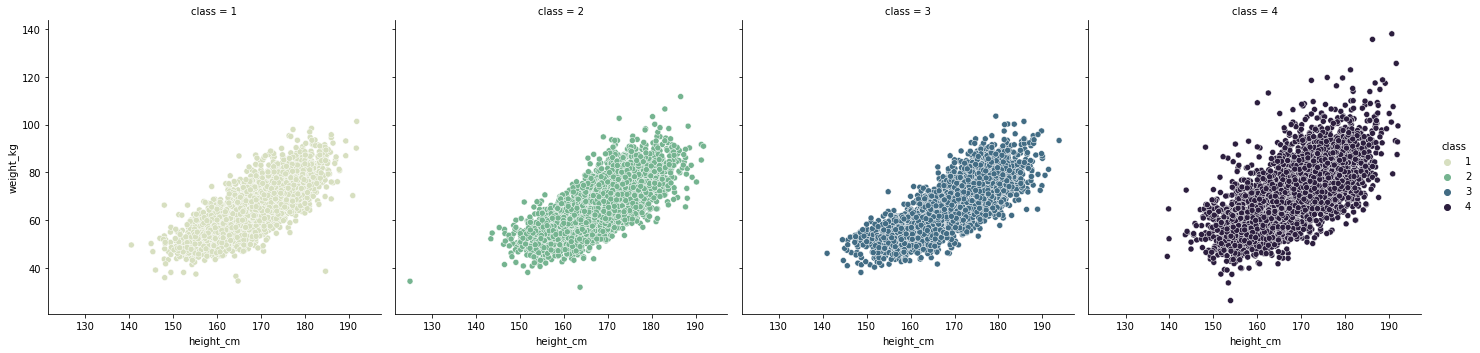

In [20]:
# Plot scatterplots of height and weight divided by class type
ax = sns.relplot(data=performance, x='height_cm', y='weight_kg', hue='class', col='class', palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
plt.show()

Come potevamo facilmente intuire le variabili altezza e peso risultano correlate 

## Altezza

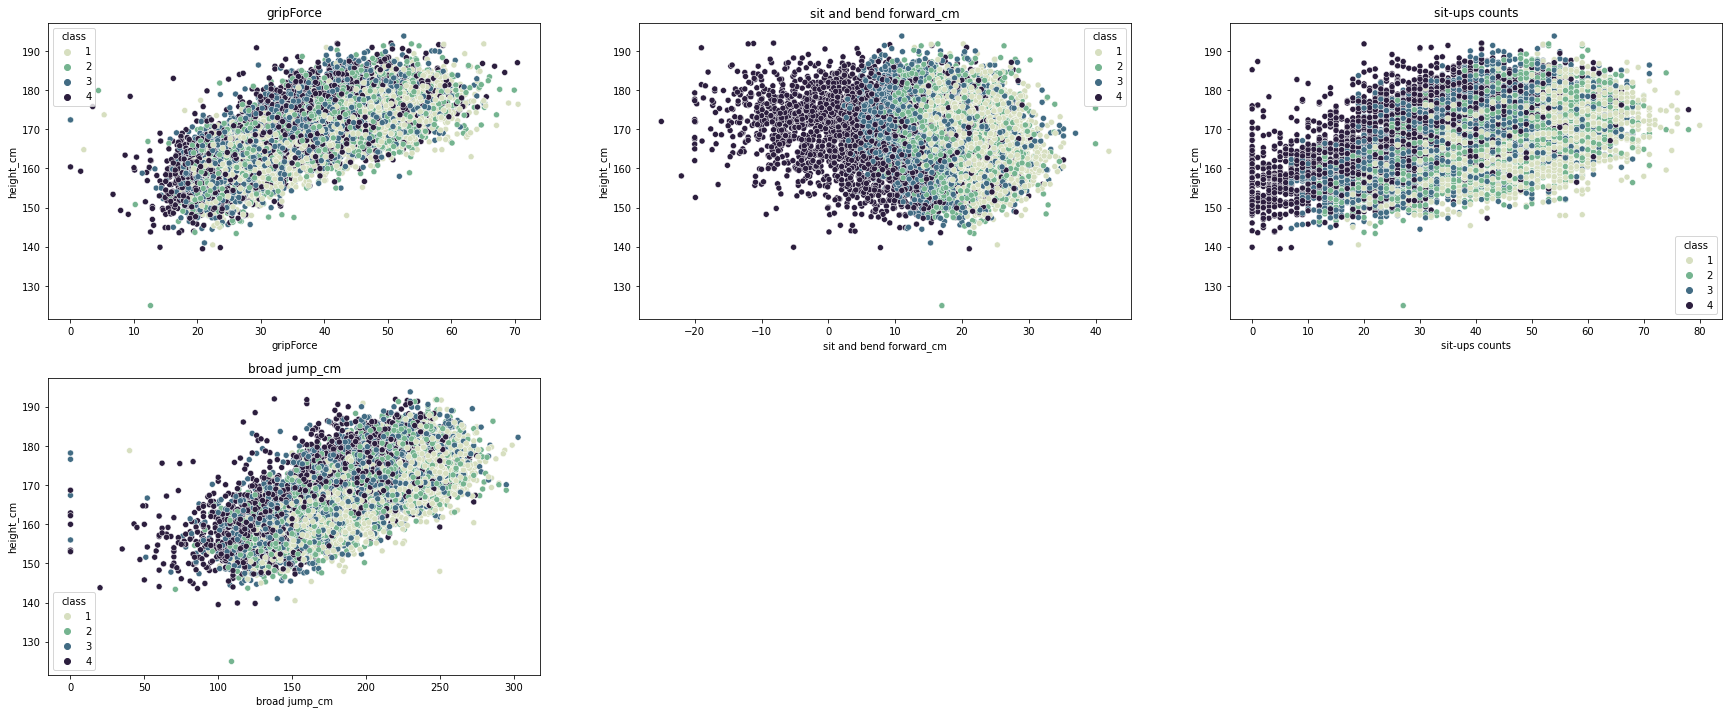

In [21]:
# Height comparison plot
plt.figure(figsize=(30,12))
tests = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']
count = 1
for i in tests:
    plt.subplot(2,3, count)
    plt.title(i)
    sns.scatterplot(data=performance, x=i, y='height_cm', hue='class', palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
    count += 1

plt.show()

In alcuni degli esercizi svolti l'altezza fornisce dei vantaggi, come `gripForce` e `broad jump_cm`

## Peso

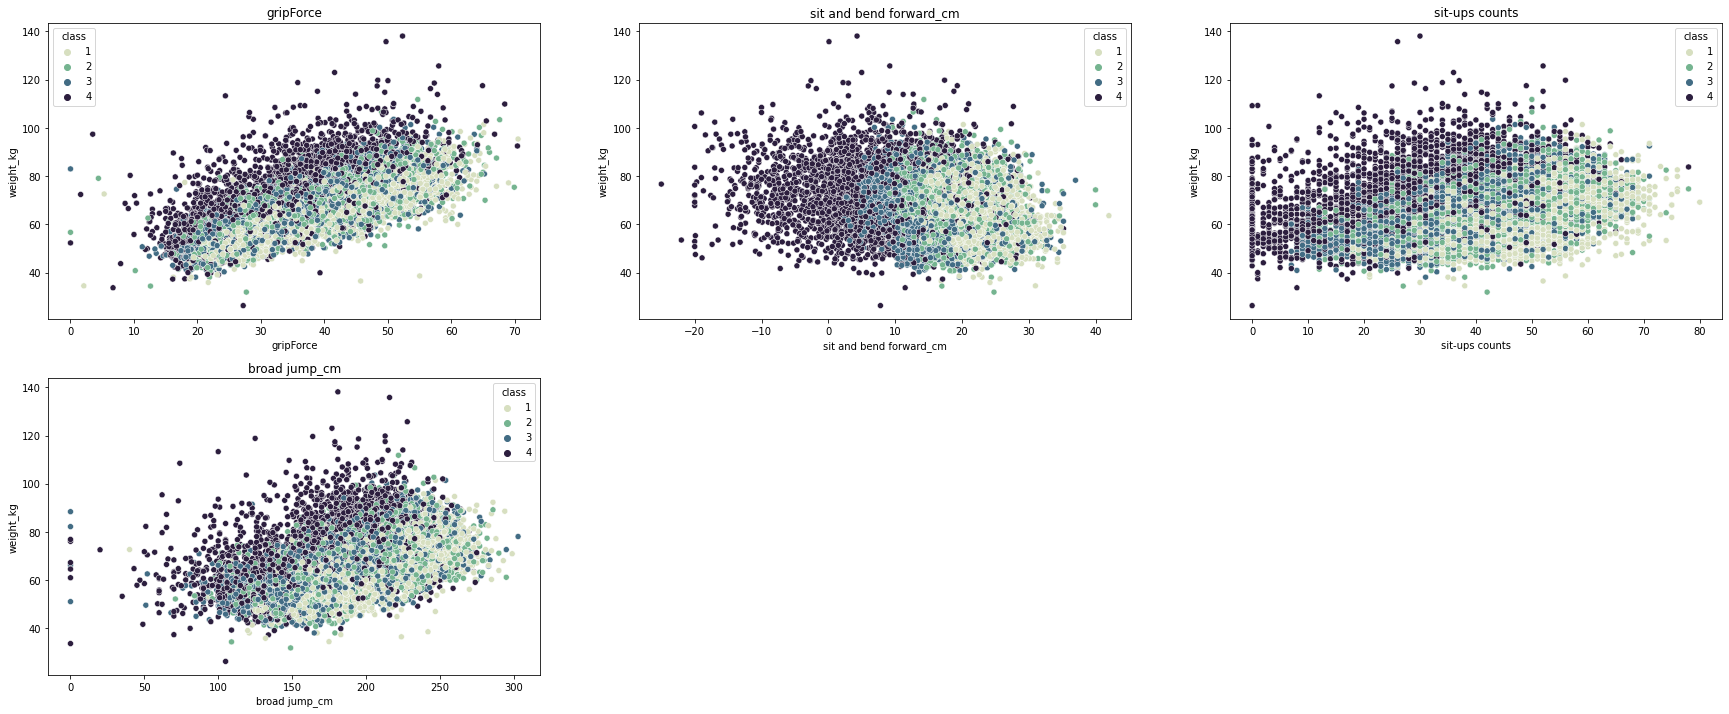

In [22]:
# Weight comparison plot
plt.figure(figsize=(30,12))
tests = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']
count = 1
for i in tests:
    plt.subplot(2,3, count)
    plt.title(i)
    sns.scatterplot(data=performance, x=i, y='weight_kg', hue='class', palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
    count += 1

plt.show()

Nel `gripForce` avere un peso maggiore è correlato ad un risultato migliore 

## Età

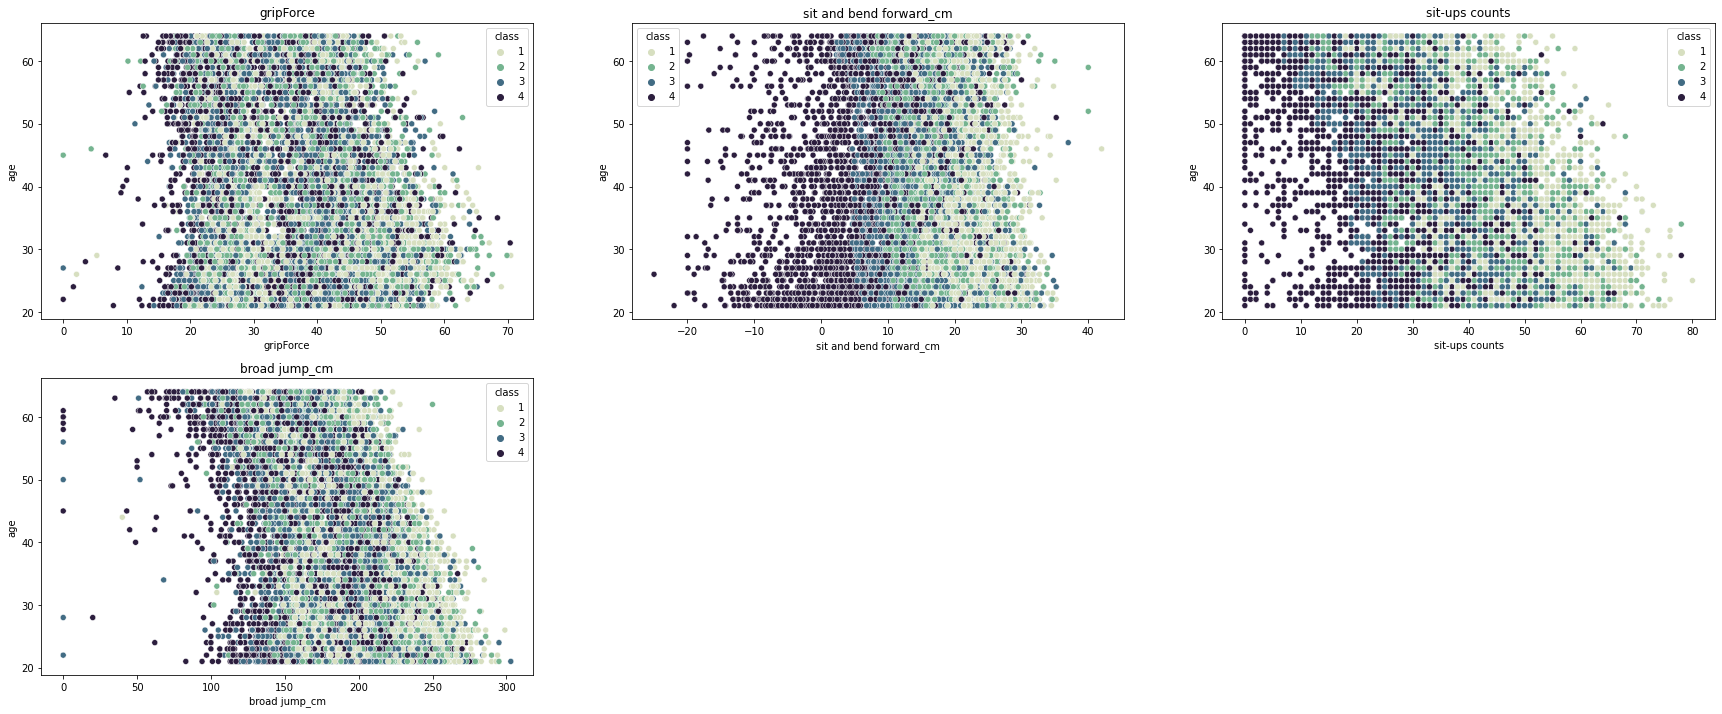

In [23]:
# Age comparison plot
plt.figure(figsize=(30,12))
tests = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']
count = 1
for i in tests:
    plt.subplot(2,3, count)
    plt.title(i)
    sns.scatterplot(data=performance, x=i, y='age', hue='class', palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
    count += 1

plt.show()

Come possiamo notare, tendenzialmente più l'atleta è giovane più i suoi risultati saranno migliori

## Classi

La variabile target `class` risulta bilanciata, pertanto non sarà necessario applicare modifiche al dataset.

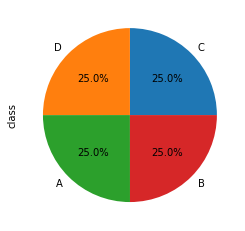

In [57]:
raw_performance['class'].value_counts().plot.pie(autopct='%1.1f%%')

In [26]:
import plotly.graph_objects as go
from plotly import subplots

def layout_default(title):
    layout = go.Layout(title = title, font = {'size': 18})
    
    return layout

class_a = raw_performance[raw_performance['class'] == 'A']
class_b = raw_performance[raw_performance['class'] == 'B']
class_c = raw_performance[raw_performance['class'] == 'C']
class_d = raw_performance[raw_performance['class'] == 'D']

classes = {'class-a': class_a, 'class-b': class_b,
           'class-c': class_c, 'class-d': class_d}

row_labels = ['Average Age', 'Average Height cm', 'Average Weight Kg', 'Average Body Fat %']
mean_values = {}
mean_values2 = {}

for class_label, class_df in classes.items():
    age_mean = round(class_df['age'].mean(), 2)
    height_mean = round(class_df['height_cm'].mean(), 2)
    weight_mean = round(class_df['weight_kg'].mean(), 2)
    body_fat_mean = round(class_df['body fat_%'].mean(), 2)
    
    grip_mean = round(class_df['gripForce'].mean(), 2)
    sitbend_mean = round(class_df['sit and bend forward_cm'].mean(), 2)
    situps_mean = round(class_df['sit-ups counts'].mean(), 2)
    broadjump_mean = round(class_df['broad jump_cm'].mean(), 2)
    
    mean_values[class_label] = [age_mean, height_mean, weight_mean, body_fat_mean]
    mean_values2[class_label] = [grip_mean, sitbend_mean, situps_mean, broadjump_mean]

tbl_header = ['<b>Attributes</b>', '<b>Class A</b>', '<b>Class B</b>', '<b>Class C</b>', '<b>Class D</b>']
row_labels1 = ['Average Age', 'Average Height cm', 'Average Weight Kg', 'Average Body Fat %']
row_labels2 = ['Avg. Grip Force', 'Avg. Sit&Bend cm', 'Avg. Sit-ups Counts', 'Avg. Broad Jumps']
trace1 = go.Table(header = dict(values = tbl_header),
                cells = dict(height = 30, values = [row_labels1, mean_values['class-a'], 
                                       mean_values['class-b'], mean_values['class-c'], 
                                       mean_values['class-d']]))

trace2 = go.Table(header = dict(values = tbl_header),
                cells = dict(height = 30, values = [row_labels2, mean_values2['class-a'], 
                                       mean_values2['class-b'], mean_values2['class-c'], 
                                       mean_values2['class-d']]))

fig = subplots.make_subplots(rows = 2, cols = 1, specs = [[{'type': 'table'}], [{'type': 'table'}]])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig.update_layout(layout_default('Class differences'))
fig.update_layout(height = 700)
fig.show()

## Matrice di correlazione

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



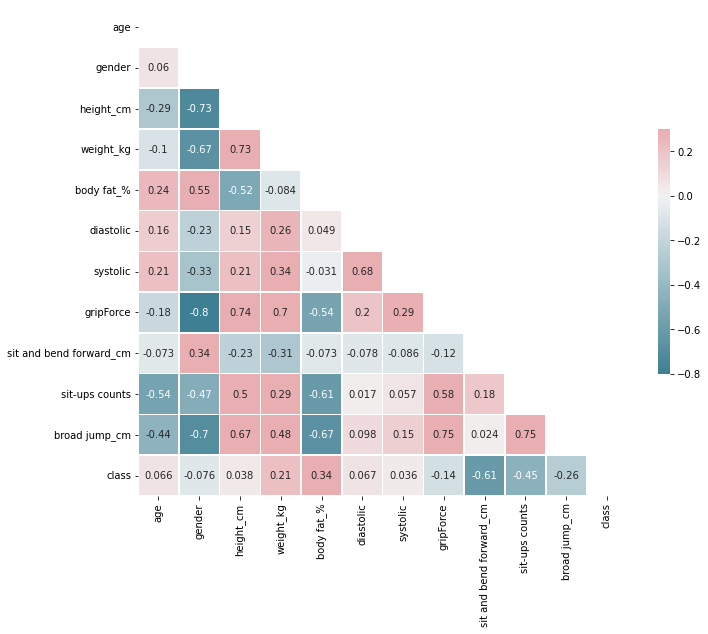

In [27]:
def plot_correlation(dataset):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(dataset, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dataset, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

plot_correlation(performance.corr())

Dalla matrice di correlazione, possiamo notare come:

`gender` - `weight_km`, `height_cm`: come potevamo aspettarci, il genere è correlato ad altezza e peso

`gender` - `gripForce`, `broad jump_cm`: il genere di una persona determini notevolmente la forza di presa e la distanza percorsa nel salto in lungo.

`body fat_%` - `broad jump_cm`, `sit-ups count`: la percentuale di grasso corporeo influisca negativamente negli esercizi come salto in lungo o sit-ups

Notiamo anche come alcune features non risultino correlate rispetto alla feature target `class`, il che potrebbe essere dovuto dal fatto che non siano direttamente correlate.

# Modelli

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [29]:
X = performance.drop('class', axis=1)
y = performance['class']

X_train, X_val, y_train, y_val = train_test_split(X, y.values.ravel(), train_size=0.7, random_state=37, stratify=y.values) 

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models = {}

In seguito sono riportati i vari modelli di classificazione testati 

## Perceptron

In [31]:
std_perceptron = Pipeline([
    ('std', None),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5, random_state=37))
])

parameters = [
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["l2", "l1"],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1, 10],
    },
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["none"]
    },
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["elasticnet"],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1, 10],
        'perceptron__l1_ratio':np.linspace(0,1,10)

    }
]

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=kf, n_jobs=-1, scoring='f1_macro')
perceptron_cv.fit(X_train, y_train)

score = perceptron_cv.score(X_val, y_val)

print("Best cross validation score: {}\n".format(perceptron_cv.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(perceptron_cv.best_params_))

models["Perceptron"] = {"Model": perceptron_cv.best_estimator_, "Score": perceptron_cv.best_score_}



Best cross validation score: 0.5002549554554444

             Test set score: 0.4863458273551775

                Best params: {'perceptron__alpha': 0.001, 'perceptron__penalty': 'l1', 'std': StandardScaler()}



In [59]:
pred = perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           1       0.59      0.76      0.66      1004
           2       0.37      0.57      0.45      1003
           3       0.50      0.07      0.12      1005
           4       0.71      0.72      0.72      1004

    accuracy                           0.53      4016
   macro avg       0.54      0.53      0.49      4016
weighted avg       0.54      0.53      0.49      4016



## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(solver="saga"))
])


parameters = [
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["none"]
    },
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.logspace(-2, 2, 5),

    },
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["elasticnet"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__l1_ratio":  [0.1,0.2,0.5,1],
    }
]



lr_gs = GridSearchCV(std_lr, parameters, cv=kf, n_jobs=-1, return_train_score=False, scoring='f1_macro')
lr_gs.fit(X_train, y_train)


score = lr_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(lr_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(lr_gs.best_params_))

models["Logistic Regression"] = {"Model": lr_gs.best_estimator_, "Score": lr_gs.best_score_}


Best cross validation score: 0.6124600800322645

             Test set score: 0.6187078444406242

                Best params: {'lr__C': 1.0, 'lr__l1_ratio': 0.2, 'lr__penalty': 'elasticnet', 'std': StandardScaler()}



In [33]:
pred = lr_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           1       0.69      0.74      0.72      1004
           2       0.48      0.45      0.46      1003
           3       0.53      0.53      0.53      1005
           4       0.77      0.76      0.77      1004

    accuracy                           0.62      4016
   macro avg       0.62      0.62      0.62      4016
weighted avg       0.62      0.62      0.62      4016



## Decision Tree

In [35]:
%%time

tree_model = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(random_state=37))
])

grid = {
    "scaler": [None, StandardScaler()],
    'tree__max_depth': [i for i in range(2, 10)]
}

tree_gs = GridSearchCV(tree_model, grid, cv=kf, n_jobs=-1, return_train_score=True, scoring='f1_macro')
tree_gs.fit(X_train, y_train)

score = tree_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(tree_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(tree_gs.best_params_))


models["Decision Tree"] = {"Model": tree_gs.best_estimator_, "Score": tree_gs.best_score_}


Best cross validation score: 0.6423484129781578

             Test set score: 0.6722203531552466

                Best params: {'scaler': None, 'tree__max_depth': 9}

CPU times: user 358 ms, sys: 20.6 ms, total: 378 ms
Wall time: 2.74 s


In [36]:
pred = tree_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           1       0.65      0.85      0.73      1004
           2       0.53      0.56      0.54      1003
           3       0.69      0.54      0.60      1005
           4       0.88      0.75      0.81      1004

    accuracy                           0.67      4016
   macro avg       0.69      0.67      0.67      4016
weighted avg       0.69      0.67      0.67      4016



## Random Forest

In [37]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=3))
])

parameters = {
    'rfc__n_estimators': [100, 200],
    'rfc__max_depth': [2, 4, 6, 8, 10],
    'rfc__min_samples_leaf': [2, 2, 10],
    'rfc__min_samples_split': [2, 10, 20],
}
    

rfc_gs = GridSearchCV(rfc, parameters, cv=kf, n_jobs=-1, return_train_score=True, scoring='f1_macro')
rfc_gs.fit(X_train, y_train)

score = rfc_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(rfc_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(rfc_gs.best_params_))

models["RandomForest"] = {"Model": rfc_gs.best_estimator_, "Score": rfc_gs.best_score_}


Best cross validation score: 0.7059411112444579

             Test set score: 0.7239868542749123

                Best params: {'rfc__max_depth': 10, 'rfc__min_samples_leaf': 2, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 200}

CPU times: user 9.57 s, sys: 568 ms, total: 10.1 s
Wall time: 7min 51s


In [60]:
pred = rfc_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           1       0.69      0.85      0.76      1004
           2       0.60      0.59      0.60      1003
           3       0.72      0.67      0.69      1005
           4       0.90      0.79      0.84      1004

    accuracy                           0.72      4016
   macro avg       0.73      0.72      0.72      4016
weighted avg       0.73      0.72      0.72      4016



## XGBoost

In [38]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_xgb = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(nthread=8, objective='binary:logistic'))
])

parameters = {
    'xgb__eta': [0.002, 0.1, 0.5],
    'xgb__max_depth': [6],
    'xgb__n_estimators': [150, 300],
    'xgb__alpha': [0.0001, 0.001]
}

xgb_gs = GridSearchCV(std_xgb, parameters, cv=kf, n_jobs=-1, return_train_score=True, scoring='f1_macro')
xgb_gs.fit(X_train, y_train)

print("Grid Search Xgboost finish")
models["XGBoost"] = {"Model": xgb_gs.best_estimator_, "Score": xgb_gs.best_score_}

Grid Search Xgboost finish


In [39]:
pred = xgb_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           1       0.73      0.88      0.80      1004
           2       0.64      0.62      0.63      1003
           3       0.75      0.69      0.72      1005
           4       0.92      0.83      0.87      1004

    accuracy                           0.75      4016
   macro avg       0.76      0.75      0.75      4016
weighted avg       0.76      0.75      0.75      4016



In [40]:
print(xgb_gs.best_estimator_)

Pipeline(steps=[('std', StandardScaler()),
                ('xgb',
                 XGBClassifier(alpha=0.0001, eta=0.002, max_depth=6,
                               n_estimators=150, nthread=8,
                               objective='multi:softprob'))])


# Riepilogo accuratezza

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
def calculate_precision_recall_f1(name, X, y) :
    model = models[name]
    y_pred = model["Model"].predict(X)
    
    model["Precision"] = precision_score(y, y_pred, average='macro')
    model["Recall"] = recall_score(y, y_pred, average='macro')
    model["F1_Score"] = f1_score(y, y_pred, average="macro")
    
    print("{}:\n\n \
    Confusion matrix:\n{}\n\n \
           Precision: {}\n \
              Recall: {}\n \
    F1 Score (macro): {}\n\n\n".format(name, 
                                 pd.DataFrame(confusion_matrix(y, y_pred), index=classes, columns=classes), 
                                 model["Precision"], 
                                 model["Recall"], 
                                 model["F1_Score"]))

In [43]:
for name, model in models.items():
    calculate_precision_recall_f1(name, X_val, y_val)

Perceptron:

     Confusion matrix:
         class-a  class-b  class-c  class-d
class-a      764      239        1        0
class-b      353      573       22       55
class-c      145      549       67      244
class-d       34      199       44      727

            Precision: 0.5413477157994702
               Recall: 0.5307531422995291
     F1 Score (macro): 0.4863458273551775



Logistic Regression:

     Confusion matrix:
         class-a  class-b  class-c  class-d
class-a      745      241       18        0
class-b      235      448      292       28
class-c       82      194      532      197
class-d       12       60      165      767

            Precision: 0.6175588582328775
               Recall: 0.6204973373471387
     F1 Score (macro): 0.6187078444406242



Decision Tree:

     Confusion matrix:
         class-a  class-b  class-c  class-d
class-a      853      131       17        3
class-b      318      560       89       36
class-c      122      275      540       68
clas

In [44]:
for name, model in models.items():
    print(name + ":\n\t\t\t\t{}".format(model["Score"]))

Perceptron:
				0.5002549554554444
Logistic Regression:
				0.6124600800322645
Decision Tree:
				0.6423484129781578
RandomForest:
				0.7059411112444579
XGBoost:
				0.7377690720755843


# Analisi del modello migliore

### Confronto modelli con intervallo di confidenza

Si verifica con **confidenza** al 95% se la F1-Score dei modelli non è statisticamente significativa una dall'altra. 



In [61]:
from scipy import stats

def difference_between_two_models(error1, error2, confidence):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Min: {}\nMax: {}\n".format(d_minus, d_plus))

lre_error = 1 - models["Logistic Regression"]["F1_Score"]
tree_error = 1 - models["Decision Tree"]["F1_Score"]
forest_error = 1 - models["RandomForest"]["F1_Score"]
per_error = 1 - models["Perceptron"]["F1_Score"]
xgb_error = 1 - models["XGBoost"]["F1_Score"]

print("XGBoost vs Logistic Regression , intervallo di confidenza:")
difference_between_two_models(xgb_error, lre_error, 0.95)

print("XGBoost vs Decision Tree , intervallo di confidenza:")
difference_between_two_models(xgb_error, tree_error, 0.95)

print("XGBoost vs RandomForest , intervallo di confidenza:")
difference_between_two_models(xgb_error, forest_error, 0.95)



XGBoost vs Logistic Regression , intervallo di confidenza:
Min: 0.11856573715036309
Max: 0.15226124463184046

XGBoost vs Decision Tree , intervallo di confidenza:
Min: 0.06536742289502588
Max: 0.0984345414579328

XGBoost vs RandomForest , intervallo di confidenza:
Min: 0.014024204760613935
Max: 0.04624475735301349



Riepilogo F1-Score

In [54]:
for name, model in models.items():
    print(name + ":\n\t\t\t\t{}".format(model["F1_Score"]))

Perceptron:
				0.4863458273551775
Logistic Regression:
				0.6187078444406242
Decision Tree:
				0.6722203531552466
RandomForest:
				0.7239868542749123
XGBoost:
				0.754121335331726
Dummy:
				0.25066141767134753


Il modello che ha ottenuto il risultato migliore è XGBoost, subito seguito dal RandomForest.

### Confronto con modello casuale

In [50]:
from sklearn.dummy import DummyClassifier

In [51]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(X_train, y_train)

random_score = random.score(X_val, y_val)
models["Dummy"] = {"Model" : random, "Score": random_score}
random_score

0.25074701195219123

Ovviamente tutti i modelli creati precedentemente sono statisticamente migliori di uno casuale; di seguito sono riportati gli intervalli di confidenza

In [52]:
calculate_precision_recall_f1("Dummy", X_val, y_val)

difference_between_two_models(1 - models["Perceptron"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Logistic Regression"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["RandomForest"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Decision Tree"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["XGBoost"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)



Dummy:

     Confusion matrix:
         class-a  class-b  class-c  class-d
class-a      258      246      257      243
class-b      239      267      232      265
class-c      274      248      235      248
class-d      267      253      237      247

            Precision: 0.25066666994999626
               Recall: 0.2507550723481179
     F1 Score (macro): 0.25066141767134753



Valore minimo: 0.2113994037704231
Valore massimo: 0.25996941559723685

Valore minimo: 0.34415033481696
Valore massimo: 0.39194251872159336

Valore minimo: 0.45046927007220655
Valore massimo: 0.49618160313492293

Valore minimo: 0.3981059264448508
Valore massimo: 0.4450119445229474

Valore minimo: 0.4810325017228569
Valore massimo: 0.5258873335979

